In [2]:
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
fs = 8000
N = 8 
t = np.arange(N) / fs 

X_t = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t)

print(len(X_t))
print(X_t)

8
[ 0.          1.20710678  1.          0.20710678  0.         -0.20710678
 -1.         -1.20710678]


In [4]:
def DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

In [5]:
def IDFT(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(2j * np.pi * k * n / N)
    return x / N  
X_f = DFT(X_t)

In [6]:
magnitude_spectrum = np.abs(X_f)
X_t_reconstructed = IDFT(X_f)

print(X_t_reconstructed)
phase_spectrum = np.angle(X_f)

frequencies = np.fft.fftfreq(N, 1 / fs)

[-2.22140387e-16+0.00000000e+00j  1.20710678e+00-3.88578059e-16j
  1.00000000e+00+4.79576201e-16j  2.07106781e-01+8.88178420e-16j
  3.37841946e-16+3.33066907e-16j -2.07106781e-01-5.55111512e-17j
 -1.00000000e+00-9.66883816e-16j -1.20710678e+00+9.43689571e-16j]


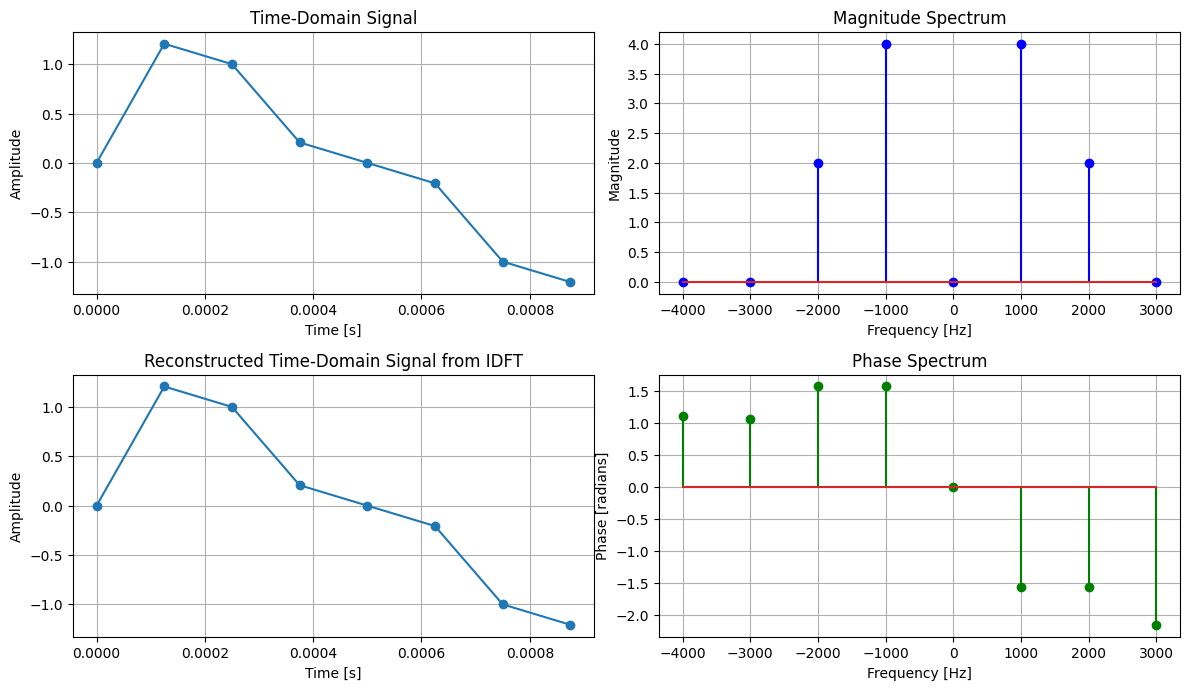

In [24]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(t, X_t, 'o-')
plt.title('Time-Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 2, 2)
plt.stem(frequencies, magnitude_spectrum, 'b')
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()


plt.subplot(3, 2, 3)
plt.plot(t, X_t_reconstructed.real, 'o-')
plt.title('Reconstructed Time-Domain Signal from IDFT')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 2, 4)
plt.stem(frequencies, phase_spectrum, 'g')
plt.title('Phase Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.tight_layout()
plt.show()